In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#wholesale customers dataset
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
sample_df = pd.read_csv(uci_path)
sample_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# 데이터 자료형
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# 데이터 통계 요약 정보
sample_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# 분석에 사용할 피처 카피
copy_df = sample_df.iloc[: , :]
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler
copy_scaler = StandardScaler().fit_transform(copy_df)
copy_scaler 

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [14]:
# 군집 모형 학습 및 예측
# 예측 결과를 데이터 프레임에 추가
sample_kmeans = KMeans(n_clusters = 6, random_state=0 , init='k-means++' , max_iter=300, n_init=10)
sample_kmeans.fit(copy_scaler)

KMeans(n_clusters=6, random_state=0)

In [15]:
# sample_kmeans.labels_
copy_df['cluster_id'] = sample_kmeans.labels_
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


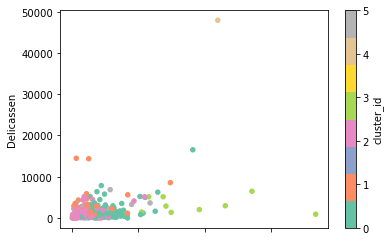

In [23]:
# 시각화
copy_df.plot(kind='scatter' , x='Milk' , y='Delicassen' , c='cluster_id' , cmap='Set2', colorbar = True)
plt.show()

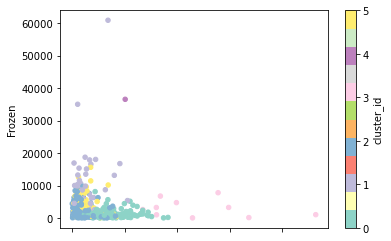

In [22]:
# plt.scatter(x=copy_df['Grocery'] , y=copy_df['Frozen'] , c=copy_df['cluster_id'])

copy_df.plot(kind='scatter' , x='Grocery' , y='Frozen' , c='cluster_id' , cmap='Set3', colorbar = True)
plt.show()

In [27]:
# 2개로 PCA 차원 축소 및 시각화 실습

from sklearn.decomposition import PCA
pca = PCA(n_components=2) #피처를 2개로 차원 축소
copy_df = pca.fit(copy_scaler).transform(copy_scaler)

copy_pca_df = pd.DataFrame(data=copy_df, columns=['pca01', 'pca02'])

copy_pca_df.head()
copy_pca_df.describe()

,pca01,pca02
count,4.400000e+02,4.400000e+02
mean,-1.251524e-16,-1.766264e-17
std,1.762689e+00,1.339419e+00
min,-1.511079e+00,-1.857323e+00
25%,-1.169264e+00,-6.888149e-01
50%,-8.029267e-01,-3.058501e-01
75%,8.547313e-01,3.291342e-01
max,1.228972e+01,1.517266e+01
